In [31]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import expon, poisson
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [ ]:
space = np.arange(100)
exp = lambda x : np.exp(x)
exp_space = exp(space)
rand_range = np.random.rand(100)
plt.figure(figsize=(20,12))
plt.plot(exp_space)

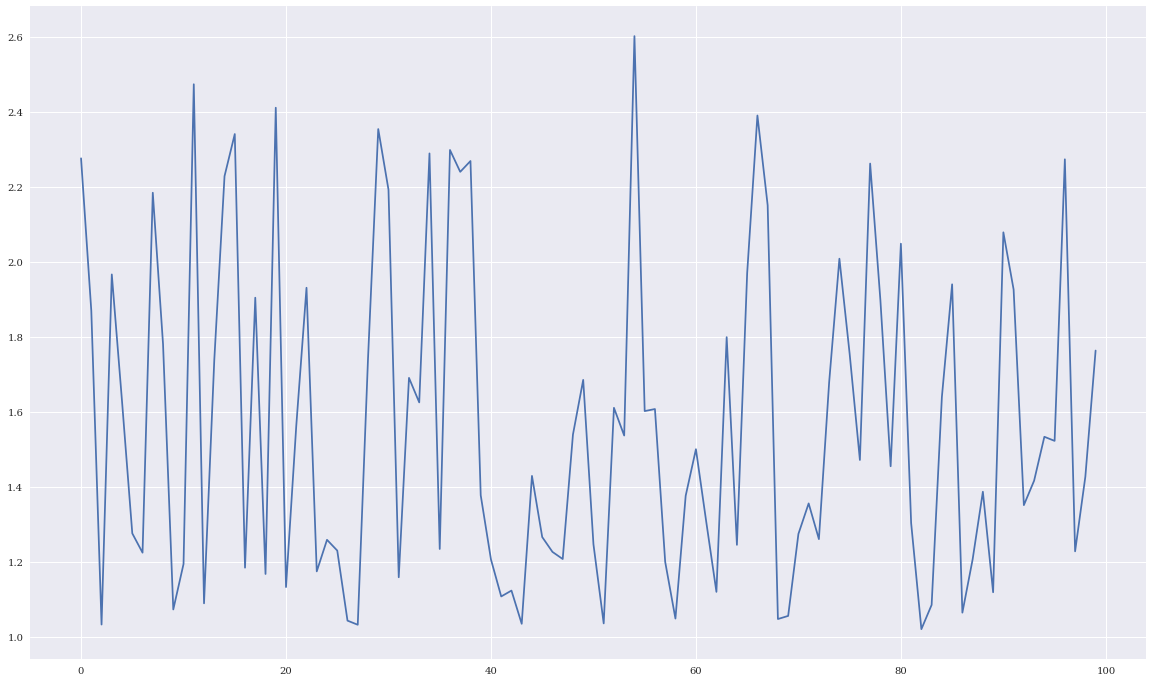

In [25]:
rand_exp_space = exp(rand_range)
plt.figure(figsize=(20,12))
plt.plot(rand_exp_space)

# Point Process
* A point process **keeps track of when random events occur over a time window**
* Examples: Lightning strikes, earthquakes, order fills
* Formally: Process $\displaystyle{ \mathrm{N}}$ is a function outputting an integer of the number point occurring in $\displaystyle{ \mathrm{A} \subset \mathrm{S}}$ where S is a metric space
* For finance purposes, the metric space is a _temporal point process_, with all events occurring between 0 and T
* Data structure wise, this is a series of time stamps $\displaystyle{\{t_{1},t{2},...,t_{n}\}}$ which generates the sequence $\displaystyle{\{u_{i} = t_{i} - t_{i-1}\}}$ of time between events
* $\displaystyle{N(t)}$ is the number of events to have occurred by time $\displaystyle{t; t \leq T, N(t) \geq 0}$
* Some obvious other properties from following - monotonically increasing, jump discontinuities at point arrival.
* A **marked point process** is one containing multiple variables per point (e.g. time of trade, volume of trade, price of trade)

# Distribution & Density
* Exponential distribution and density function define variables in Poisson Point Process…

Text(0.5, 1.0, 'Exponential CDF')

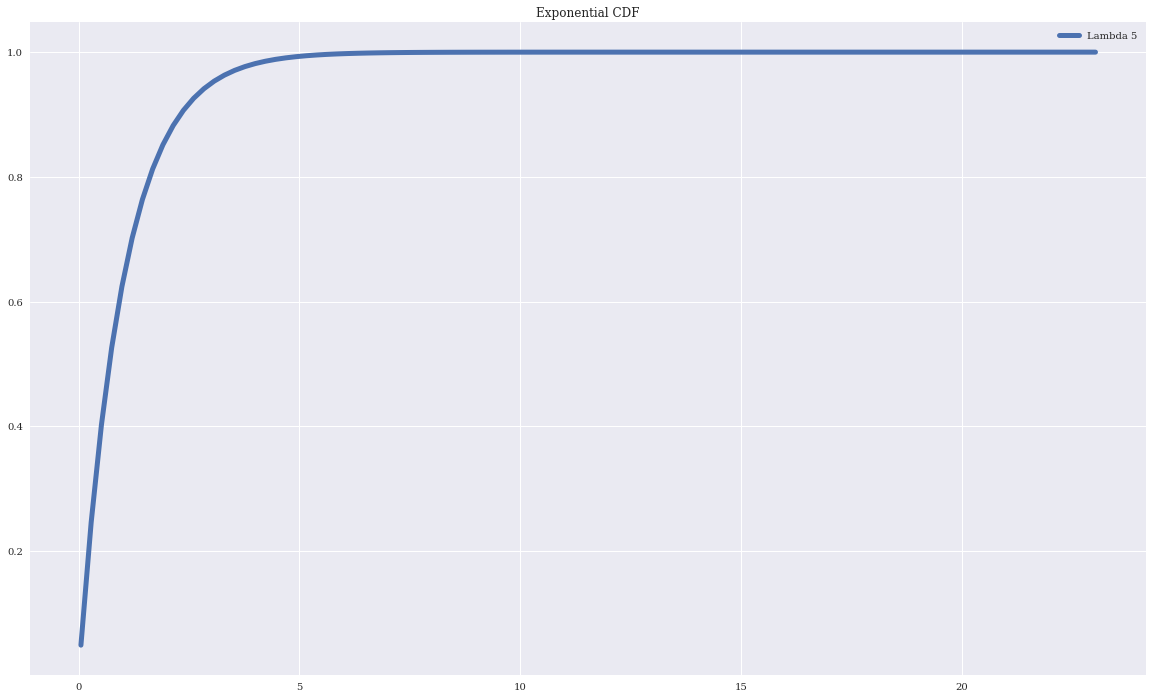

In [28]:
x = np.linspace(expon.ppf(0.01, scale=5),expon.ppf(0.99, scale=5), 100)
curve_lamb_five = expon.cdf(x, loc=0)
plt.figure(figsize=(20,12))
plt.plot(x, curve_lamb_five, lw=5, label='Lambda 5')
plt.legend(loc='best')
plt.title('Exponential CDF')

Text(0.5, 1.0, 'Exponential PDF')

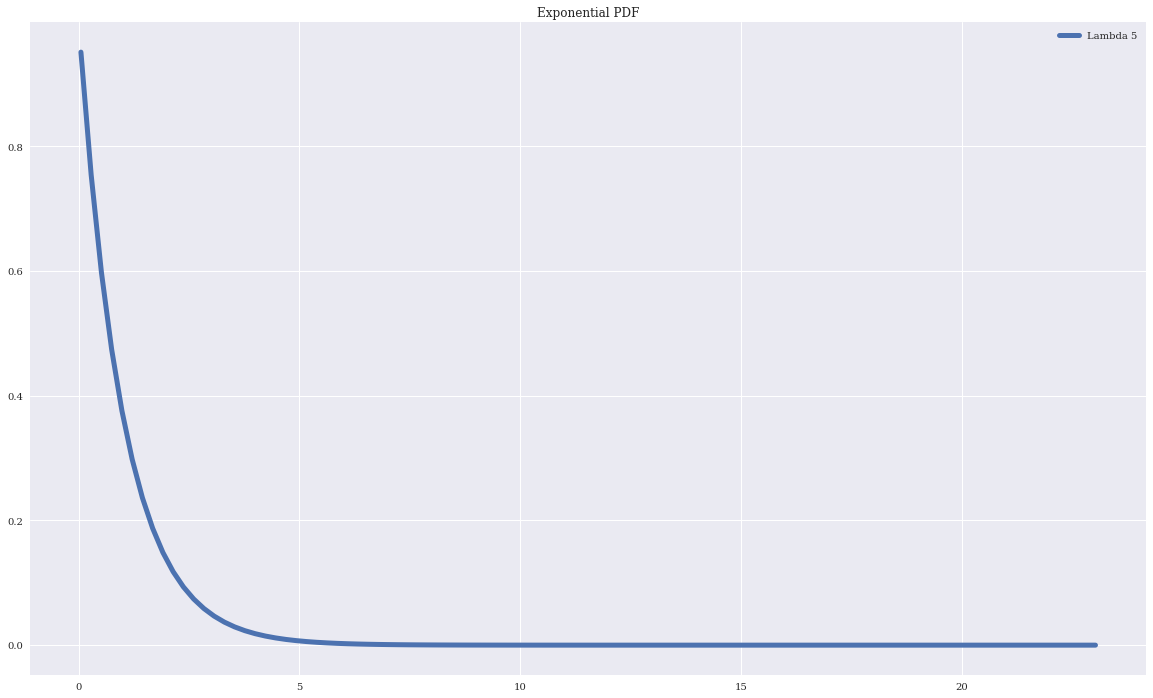

In [29]:
pdf_lamb_five = expon.pdf(x, loc=0)
plt.figure(figsize=(20,12))
plt.plot(x, pdf_lamb_five, lw=5, label='Lambda 5')
plt.legend(loc='best')
plt.title('Exponential PDF')

# Poisson Process
* Formally: Let $\displaystyle{\tau_{1}, \tau{2}...}$ be independent exponential variables, and $\displaystyle{T_{n} = \tau_{1} + \tau{2} + ... + \tau_{n}}$ for $\displaystyle{n \geq 1}, T_{0} = 0$, and $\displaystyle{N(s) = max\{n: T_{n} \leq s\}}$
* So, at any point in continuous time t, N(t) returns a constant of events having arrived dependent on the lambda parameter (a *homogenous Poisson Process*), i.e. the *max* in the above is the number of events that have arrived by time T
* All increments of a Poisson process can be evaluated without iterating over previous events, so are independent.
* Formally, if: $\displaystyle{N(0) = 0, N(t + s) - N(s) = Poisson(\lambda t), N(t)}$ is discrete, than N(s) is a Poisson Process

Text(0.5, 1.0, 'Poisson Probability Mass Function')

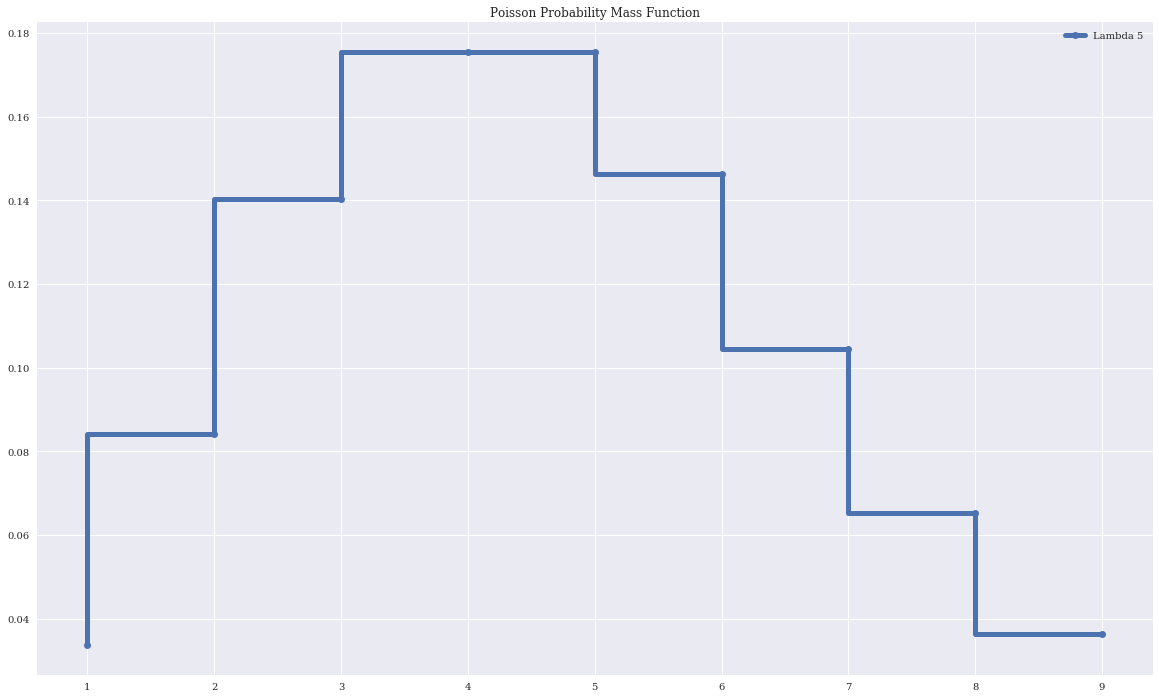

In [73]:
pois_x = np.arange(1,10)
pois_pmf = poisson.pmf(pois_x, mu=1)
pois_pmf_three = poisson.pmf(pois_x, mu=3)
pois_pmf_five = poisson.pmf(pois_x, mu=5)
plt.figure(figsize=(20,12))
# plt.plot(pois_pmf, label='Lambda 1', lw=5)
# plt.plot(pois_pmf_three, label='Lambda 3', lw=5)
# plt.plot(pois_pmf_five, label='Lambda 5', lw=5)
plt.step(x=pois_x, y=pois_pmf_five, label='Lambda 5', marker='o', lw=5)
plt.legend(loc='best')

plt.title('Poisson Probability Mass Function')


array([0.04042768, 0.12465202, 0.26502592, 0.44049329, 0.61596065,
       0.76218346, 0.86662833, 0.93190637, 0.96817194])

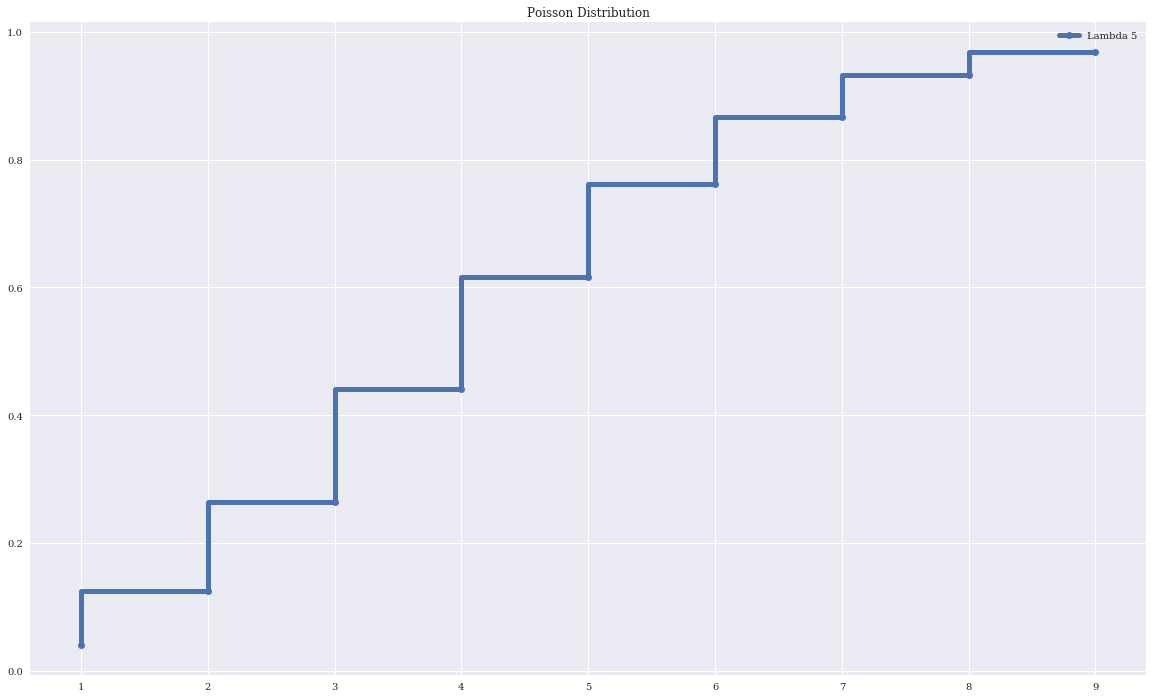

In [72]:
pois_x = np.arange(1,10)
pois_cdf = poisson.cdf(pois_x, mu=1)
pois_cdf_three = poisson.cdf(pois_x, mu=3)
pois_cdf_five = poisson.cdf(pois_x, mu=5)
plt.figure(figsize=(20,12))
# plt.plot(pois_cdf, label='Lambda 1', marker='o')
# plt.plot(pois_cdf_three, label='Lambda 3', marker='o')
plt.step(x=pois_x, y=pois_cdf_five, label='Lambda 5', marker='o', lw=5)
plt.legend(loc='best')
plt.title('Poisson Distribution')
pois_cdf_five